In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataset = pd.read_csv("Social_Network_Ads.csv")

In [3]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
X = dataset[['Age','EstimatedSalary']]
y = dataset['Purchased']

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
sc_X = StandardScaler()

In [9]:
X_train = sc_X.fit_transform(X_train)

In [10]:
X_test = sc_X.transform(X_test)

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
lr = LogisticRegression(random_state=0)

In [13]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [14]:
pred = lr.predict(X_test)

In [15]:
from sklearn.metrics import confusion_matrix, classification_report

In [16]:
print(confusion_matrix(y_test,pred))

[[61  2]
 [10 27]]


In [17]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.86      0.97      0.91        63
          1       0.93      0.73      0.82        37

avg / total       0.89      0.88      0.88       100



In [18]:
from matplotlib.colors import ListedColormap

In [19]:
X_set , y_set = X_train, y_train

In [20]:
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1,stop = X_set[:,0].max()+1,step = 0.01),
                     np.arange(start = X_set[:,1].min()-1,stop = X_set[:,1].max()+1,step = 0.01)     )

Text(0,0.5,'Estimated Salary')

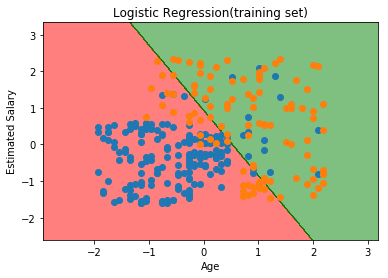

In [21]:
plt.contourf(X1,X2,lr.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),alpha = 0.5,cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j,0],X_set[y_set == j,1],cmap=ListedColormap(('red','green'))(i),label=j)
plt.title('Logistic Regression(training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')

Text(0,0.5,'Estimated Salary')

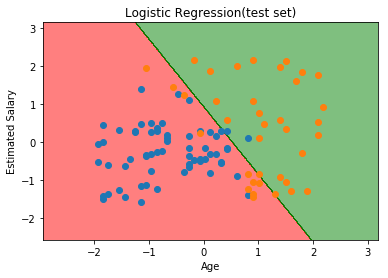

In [22]:
X_set , y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1,stop = X_set[:,0].max()+1,step = 0.01),
                     np.arange(start = X_set[:,1].min()-1,stop = X_set[:,1].max()+1,step = 0.01)     )
plt.contourf(X1,X2,lr.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),alpha = 0.5,cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j,0],X_set[y_set == j,1],cmap=ListedColormap(('red','green'))(i),label=j)
plt.title('Logistic Regression(test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')